# Figure D: Phrase length distributions

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets
matplotlib.style.use('styles.mplstyle')

In [3]:
# Load all data
dfs, contours = load_datasets()

In [11]:
def plot_phrase_length_dist(phrase_lengths, title="Phrase lengths"):
    sns.distplot(phrase_lengths, label='Observed')
    plt.title(title, ha='left', x=0)
    xs = range(30)
    mean_phrase_length = np.mean(phrase_lengths)
    ys = scipy.stats.poisson.pmf(xs, mu=mean_phrase_length)
    plt.plot(xs, ys, '.-', label=f'Poisson($\lambda={mean_phrase_length:.1f}$)')
    plt.xlabel('number of notes')
    plt.legend()

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  if __name__ == '__main__':


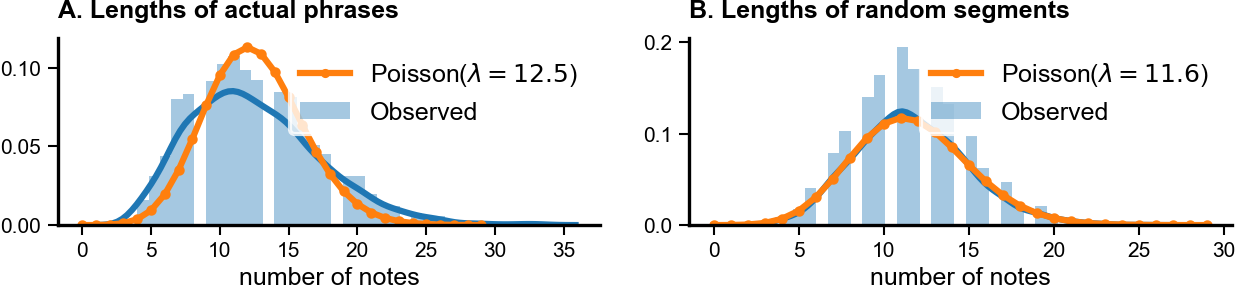

In [44]:
plt.figure(figsize=cm2inch(11, 3))
plt.subplot(121)
plot_phrase_length_dist(dfs['han']['phrase_length'],
                       title='A. Lengths of actual phrases')

plt.subplot(122)
plot_phrase_length_dist(dfs['han-random']['phrase_length'],
                        title='B. Lengths of random segments')
plt.tight_layout()
plt.savefig('../figures/figD1-poisson-approximation-han.pdf')

In [30]:
dataset_ids=[
        'erk',
        'boehme',
#         'creighton',
        'han', 
        'natmin',
#         'shanxi',
#         'essen-europe',
#         'essen-china',
#         'essen-europe-china',
        'liber-antiphons',
        'liber-responsories',
#         'liber-alleluias'
    ]

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


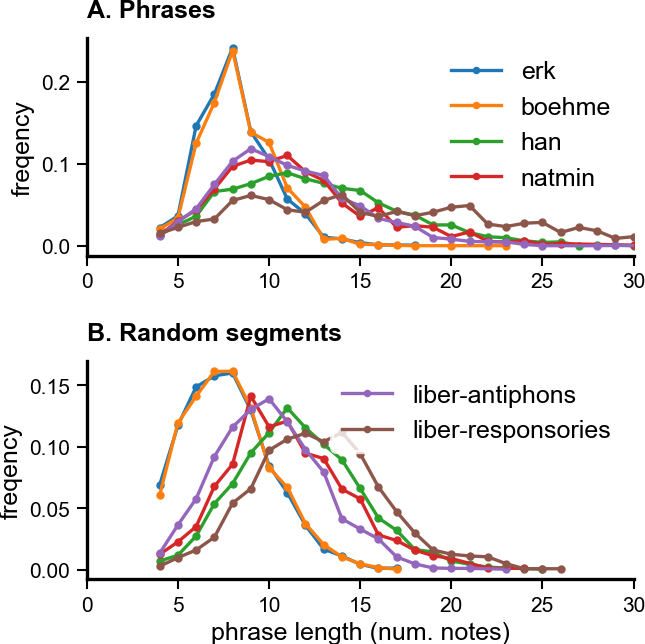

In [38]:
matplotlib.style.use('styles.mplstyle')

plt.figure(figsize=cm2inch(6,6))

ax1 = plt.subplot(211)
for i, dataset_id in enumerate(dataset_ids):
    phrase_lengths = dfs[dataset_id]['phrase_length']
    counts = pd.value_counts(phrase_lengths).sort_index()
    counts = counts / counts.sum()
    label = None if i > 3 else dataset_id
    plt.plot(counts.index, counts.values, '.-', lw=.8, ms=2, label=label)
plt.xlim(0, 30)
plt.legend()
plt.title('A. Phrases', ha='left', x=0)
plt.ylabel('freqency')

ax2 = plt.subplot(212, sharex=ax1)
for i, dataset_id in enumerate(dataset_ids):
    phrase_lengths = dfs[dataset_id+'-random']['phrase_length']
    counts = pd.value_counts(phrase_lengths).sort_index()
    counts = counts / counts.sum()
    label = None if i <= 3 else dataset_id
    plt.plot(counts.index, counts.values, '.-', lw=.8, ms=2, label=label)
plt.xlim(0, 30)
plt.legend()
plt.ylabel('freqency')
plt.title('B. Random segments', ha='left', x=0)
plt.xlabel('phrase length (num. notes)')
plt.tight_layout()
plt.savefig('../figures/figD2-length-distribution.pdf')